In [1]:
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
import pyspark
pyspark.__version__

'2.1.1'

In [4]:
import pandas as pd
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)

### Pre-processing
#### Read CSV file into PySpark dataset:df

In [5]:
df = spark.read.csv('data/bank-additional-full.csv',sep=';',header=True,inferSchema=True)
df.show(2)

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
+---+-----

In [6]:
# Rename column name from "xxx.xxx.xxx" to "xxx_xxx_xxx" format for readable by Spark
df = df.withColumnRenamed("emp.var.rate","emp_var_rate")\
    .withColumnRenamed("cons.price.idx","cons_price_idx")\
    .withColumnRenamed("cons.conf.idx","cons_conf_idx")\
    .withColumnRenamed("nr.employed","nr_employed")

In [7]:
cols = df.columns
print(cols)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [8]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



In [9]:
# Descriptive Statistics
df.describe().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+-----------------+-----------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|         campaign|            pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|    y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+-----------------+-----------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|    41188|41188|      41188|             41188|   

In [10]:
# Check column null value count
for col in df.columns:
    print("no. of cells in column", col, "with null values:",
          df.filter(df[col].isNull()).count())

no. of cells in column age with null values: 0
no. of cells in column job with null values: 0
no. of cells in column marital with null values: 0
no. of cells in column education with null values: 0
no. of cells in column default with null values: 0
no. of cells in column housing with null values: 0
no. of cells in column loan with null values: 0
no. of cells in column contact with null values: 0
no. of cells in column month with null values: 0
no. of cells in column day_of_week with null values: 0
no. of cells in column duration with null values: 0
no. of cells in column campaign with null values: 0
no. of cells in column pdays with null values: 0
no. of cells in column previous with null values: 0
no. of cells in column poutcome with null values: 0
no. of cells in column emp_var_rate with null values: 0
no. of cells in column cons_price_idx with null values: 0
no. of cells in column cons_conf_idx with null values: 0
no. of cells in column euribor3m with null values: 0
no. of cells in 

In [11]:
# Get unique value count for multiple string columns
string_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
#df.select(string_columns).groupby(string_columns).count().show()
df.select('job').groupby('job').count().show()
df.select('marital').groupby('marital').count().show()
df.select('education').groupby('education').count().show()
df.select('default').groupby('default').count().show()
df.select('housing').groupby('housing').count().show()
df.select('loan').groupby('loan').count().show()
df.select('contact').groupby('contact').count().show()
df.select('month').groupby('month').count().show()
df.select('day_of_week').groupby('day_of_week').count().show()
df.select('poutcome').groupby('poutcome').count().show()
df.select('y').groupby('y').count().show()

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2924|
|      retired| 1720|
|      unknown|  330|
|self-employed| 1421|
|      student|  875|
|  blue-collar| 9254|
| entrepreneur| 1456|
|       admin.|10422|
|   technician| 6743|
|     services| 3969|
|    housemaid| 1060|
|   unemployed| 1014|
+-------------+-----+

+--------+-----+
| marital|count|
+--------+-----+
| unknown|   80|
|divorced| 4612|
| married|24928|
|  single|11568|
+--------+-----+

+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 9515|
|            unknown| 1731|
|           basic.6y| 2292|
|professional.course| 5243|
|  university.degree|12168|
|         illiterate|   18|
|           basic.4y| 4176|
|           basic.9y| 6045|
+-------------------+-----+

+-------+-----+
|default|count|
+-------+-----+
|unknown| 8597|
|     no|32588|
|    yes|    3|
+-------+-----+

+-------+-----+
|housing|count|
+-------+-----+
|unknown|  9

In [12]:
# Get distinct value for each string column
df.select('job').distinct().show()
df.select('marital').distinct().show()
df.select('education').distinct().show()
df.select('default').distinct().show()
df.select('housing').distinct().show()
df.select('loan').distinct().show()
df.select('contact').distinct().show()
df.select('month').distinct().show()
df.select('day_of_week').distinct().show()
df.select('poutcome').distinct().show()
df.select('y').distinct().show()

+-------------+
|          job|
+-------------+
|   management|
|      retired|
|      unknown|
|self-employed|
|      student|
|  blue-collar|
| entrepreneur|
|       admin.|
|   technician|
|     services|
|    housemaid|
|   unemployed|
+-------------+

+--------+
| marital|
+--------+
| unknown|
|divorced|
| married|
|  single|
+--------+

+-------------------+
|          education|
+-------------------+
|        high.school|
|            unknown|
|           basic.6y|
|professional.course|
|  university.degree|
|         illiterate|
|           basic.4y|
|           basic.9y|
+-------------------+

+-------+
|default|
+-------+
|unknown|
|     no|
|    yes|
+-------+

+-------+
|housing|
+-------+
|unknown|
|     no|
|    yes|
+-------+

+-------+
|   loan|
+-------+
|unknown|
|     no|
|    yes|
+-------+

+---------+
|  contact|
+---------+
| cellular|
|telephone|
+---------+

+-----+
|month|
+-----+
|  jun|
|  aug|
|  may|
|  sep|
|  mar|
|  oct|
|  jul|
|  nov|
|  apr|
|  dec|

#### Transforming dataset for machine learning algorithm readable using Spark Pipeline API

In [13]:
# Pre-processing with One-Hot Encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [14]:
categoricalColumns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
stages = [] # stages in our Pipeline or transformations in dataset
for col in categoricalColumns:
# Category Indexing with StringIndexer similar to LabelEncoder in sklearn 
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    encoder = OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec")
# Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [15]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol = "y", outputCol = "label")
stages += [label_stringIdx]

In [16]:
# Transform all features into a vector using VectorAssembler
from pyspark.ml.feature import VectorAssembler, StandardScaler
featurecols=["age","job_vec","marital_vec","education_vec","default_vec","housing_vec","loan_vec","contact_vec",\
             "month_vec","day_of_week_vec","duration","campaign","pdays","previous","poutcome_vec","emp_var_rate",\
             "cons_price_idx","cons_conf_idx","euribor3m","nr_employed"]

assembler = VectorAssembler(inputCols=featurecols, outputCol="features")
stages += [assembler]

In [17]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)

In [18]:
# The data will flow in spark now and it will take some time to complete. 
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

In [19]:
# Keep relevant columns 
# "label" column is the transformation of initial "y" column
# "features" is the numerical representation of all the data columns of numerical+categorical. 
selectedcols = ["label", "features"] + cols
dataset = df.select(selectedcols)
dataset.show(3)

+-----+--------------------+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|label|            features|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----+--------------------+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|  0.0|(53,[0,9,12,19,22...| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|  0.0|(53,[0,4,12,16,23...| 57| services|married|high.school|unknown|     no|  no|telephone|  may| 

In [20]:
# Randomly split dataset into training and test sets. set seed for reproducibility
# Simialr to sklearn test_train_split
train_data, test_data = dataset.randomSplit([0.8,0.2], seed = 100)
print(train_data.count())
print(test_data.count())

33010
8178


#### Standardize/Scaler dataset

In [21]:
# Standardize
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)
scalerModel = scaler.fit(train_data)
scaledData = scalerModel.transform(train_data)
scaledData_test = scalerModel.transform(test_data)
scaledData.select("label","scaledFeatures").take(3) 

[Row(label=0.0, scaledFeatures=DenseVector([-1.4409, 1.7225, -0.5361, -0.4437, -0.328, -0.2763, -0.2091, -0.1922, -0.189, -0.1644, -0.1577, -0.1475, 0.8064, -0.6252, -0.3535, 1.5368, -0.5488, -0.411, -0.3802, -0.3377, -0.2423, -0.209, 0.5116, -0.5115, 0.9558, -0.91, 0.4597, -0.4202, 0.7567, -0.7087, 2.1833, -0.4209, -0.3847, -0.3325, -0.2612, -0.1355, -0.1184, -0.1154, 1.9501, -0.5103, -0.4972, -0.4941, -0.7712, 0.8865, 0.1957, -0.3509, 0.3989, -0.3404, 0.8407, 0.5931, -0.4758, 0.778, 0.8464])),
 Row(label=0.0, scaledFeatures=DenseVector([-1.3451, 1.7225, -0.5361, -0.4437, -0.328, -0.2763, -0.2091, -0.1922, -0.189, -0.1644, -0.1577, -0.1475, 0.8064, -0.6252, -0.3535, 1.5368, -0.5488, -0.411, -0.3802, -0.3377, -0.2423, -0.209, 0.5116, -0.5115, 0.9558, -0.91, 0.4597, -0.4202, 0.7567, -0.7087, 2.1833, -0.4209, -0.3847, -0.3325, -0.2612, -0.1355, -0.1184, -0.1154, 1.9501, -0.5103, -0.4972, -0.4941, -0.2997, -0.5667, 0.1957, -0.3509, 0.3989, -0.3404, 0.8407, 0.5931, -0.4758, 0.7751, 0.8464]

### Logistic Regression

#### Prediction

In [22]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="scaledFeatures", 
                        maxIter=100, regParam=0.0001, family="multinomial")

# Train model with Training Data
lrModel = lr.fit(scaledData)
predictions = lrModel.transform(scaledData_test)
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)
 |-- scaledFeatures: vector (nullable = true)
 |-- rawPrediction: vector (nullabl

In [23]:
# View model's predictions and probabilities of each prediction class
predictions.select("label", "prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
+-----+----------+
only showing top 5 rows



#### Evaluation

In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(accuracy)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall")
weighted_recall = evaluator.evaluate(predictions)
print(weighted_recall)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
weighted_precision = evaluator.evaluate(predictions)
print(weighted_precision)

0.9111029591587185
0.9111029591587185
0.8995635176493563


In [25]:
# Print confusion-matrix
predictions.select('label','prediction').groupby('label','prediction').count().sort('prediction')\
.sort('label').show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       0.0| 7085|
|  0.0|       1.0|  187|
|  1.0|       0.0|  540|
|  1.0|       1.0|  366|
+-----+----------+-----+



### Random Forest Classification

#### Prediction

In [26]:
from pyspark.ml.classification import RandomForestClassifier

# Create Random Forest Classification model
rf = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures", 
                            numTrees=20)

# Train model with Training Data
rfModel = rf.fit(scaledData)
predictions_rf = rfModel.transform(scaledData_test)

In [27]:
# View Random Forest model's predictions and probabilities of each prediction class
predictions.select("label", "prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
+-----+----------+
only showing top 5 rows



#### Evaluation

In [28]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_rf)
print(accuracy)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions_rf)
print(recall)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions_rf)
print(precision)

0.9025434091464906
0.9025434091464906
0.88742939779402


In [29]:
# Print confusion-matrix
predictions_rf.select('label','prediction').groupby('label','prediction').count().sort('prediction')\
.sort('label').show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       0.0| 7203|
|  0.0|       1.0|   69|
|  1.0|       0.0|  728|
|  1.0|       1.0|  178|
+-----+----------+-----+



### Hyper Parameter selection

In [30]:
# Create ParamGrid for Cross Validation
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

rf = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures")

paramGrid = (ParamGridBuilder()\
             .addGrid(rf.maxDepth, [2, 6])\
             .addGrid(rf.numTrees, [5, 20])\
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(scaledData)

In [31]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(scaledData_test)
evaluator.evaluate(predictions)

0.891206254828722

In [32]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
accuracies = []
for nofT in range(1,11,2):
    rf = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures", 
                            numTrees=nofT)
    rfModel = rf.fit(scaledData)
    predictions_rf = rfModel.transform(scaledData_test)
    evaluator = MulticlassClassificationEvaluator(
        labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracies.append(evaluator.evaluate(predictions_rf))

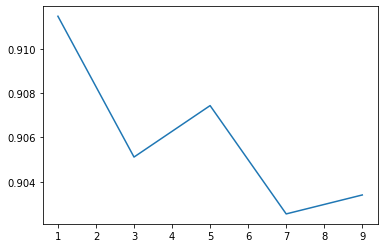

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,11,2),accuracies)

In [35]:
spark.stop()